<a href="https://colab.research.google.com/github/matule00/mmd/blob/main/mmd_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = loadmat('MMDS_data.mat')

#Můj pokus

In [ ]:
# Create DataFrame
df = pd.DataFrame({
    'time': data['time'].flatten(),
    'velo': data['velo'].flatten(),
    'gap': data['gap'].flatten(),
    'delka': data['delka'].flatten(),
    'clearance': data['clearance'].flatten()
})

# Optionally, set column names
# df.columns = ['time', 'velo', 'gap', 'delka', 'clearance']

# Display DataFrame
print(df)

                time  velo    gap  delka  clearance
0              20.74   115  20.58    3.6  20.639478
1              21.32    99   0.39    3.5   0.459091
2              25.21    99   3.66    4.3   3.729091
3              25.82   100   0.39    4.2   0.458400
4              26.37    97   0.33    3.9   0.400515
...              ...   ...    ...    ...        ...
2936751  16027368.08   116   0.29    5.1   0.348966
2936752  16027374.04   131   5.80    4.0   5.852214
2936753  16027376.02   126   1.81    4.2   1.864286
2936754  16027376.27   127   0.06    4.5   0.113858
2936755  16027379.02   122   2.58    4.1   2.636066

[2936756 rows x 5 columns]


In [ ]:
samples = [df.iloc[i:i+50] for i in range(0, len(df), 50)]

# Example: Print the first sample
print(samples[0])

      time  velo    gap  delka  clearance
0    20.74   115  20.58    3.6  20.639478
1    21.32    99   0.39    3.5   0.459091
2    25.21    99   3.66    4.3   3.729091
3    25.82   100   0.39    4.2   0.458400
4    26.37    97   0.33    3.9   0.400515
5    27.40    99   0.81    4.2   0.879091
6    28.08    96   0.45    4.1   0.521250
7    28.86    98   0.56    4.4   0.629796
8    30.92    97   1.82    4.4   1.890515
9    31.42    99   0.30    3.9   0.369091
10   34.50   112   2.91    3.6   2.971071
11   36.89   117   2.11    6.8   2.168462
12   38.80   115   1.72    4.1   1.779478
13   39.51   109   0.50    4.2   0.562752
14   44.52   113   4.83    3.9   4.890531
15   45.70   108   0.95    5.1   1.013333
16   50.53   138   4.68    3.8   4.729565
17   55.89   121   5.18    4.1   5.236529
18   60.04   144   4.01    4.3   4.057500
19   63.66   140   3.47    4.0   3.518857
20   69.83   145   6.02    4.0   6.067172
21   75.45   123   5.44    4.2   5.495610
22   77.05   113   1.41    4.0   1

In [ ]:
scaled_samples = []
for sample in samples:
    mean_clearance = sample['clearance'].mean()
    scaled_clearance = sample['clearance'] / mean_clearance
    sample_scaled = sample.copy()  # Create a copy of the sample DataFrame
    sample_scaled['clearance'] = scaled_clearance
    scaled_samples.append(sample_scaled)

In [ ]:
print(scaled_samples[0])

      time  velo    gap  delka  clearance
0    20.74   115  20.58    3.6   6.298438
1    21.32    99   0.39    3.5   0.140098
2    25.21    99   3.66    4.3   1.137987
3    25.82   100   0.39    4.2   0.139887
4    26.37    97   0.33    3.9   0.122223
5    27.40    99   0.81    4.2   0.268267
6    28.08    96   0.45    4.1   0.159067
7    28.86    98   0.56    4.4   0.192191
8    30.92    97   1.82    4.4   0.576918
9    31.42    99   0.30    3.9   0.112633
10   34.50   112   2.91    3.6   0.906666
11   36.89   117   2.11    6.8   0.661738
12   38.80   115   1.72    4.1   0.543034
13   39.51   109   0.50    4.2   0.171732
14   44.52   113   4.83    3.9   1.492417
15   45.70   108   0.95    5.1   0.309233
16   50.53   138   4.68    3.8   1.443296
17   55.89   121   5.18    4.1   1.598003
18   60.04   144   4.01    4.3   1.238205
19   63.66   140   3.47    4.0   1.073831
20   69.83   145   6.02    4.0   1.851486
21   75.45   123   5.44    4.2   1.677066
22   77.05   113   1.41    4.0   0

In [ ]:
diag = []

for sample in scaled_samples:
    I = len(sample['time']) / (sample['time'].iloc[-1] - sample['time'].iloc[0]) * 3600
    V = sample['velo'].mean()
    ro = I / V
    diag.append([V, ro, I])

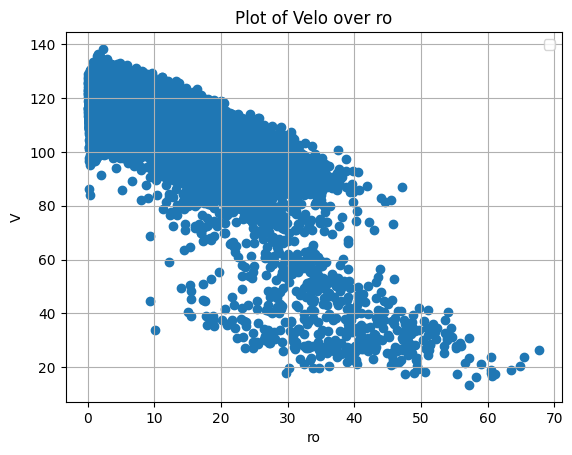

In [ ]:
diag_a = np.array(diag)

plt.scatter(diag_a[:,1], diag_a[:,0])
plt.xlabel('ro')
plt.ylabel('V')
plt.title('Plot of Velo over ro')
plt.legend()
plt.grid(True)
plt.show()

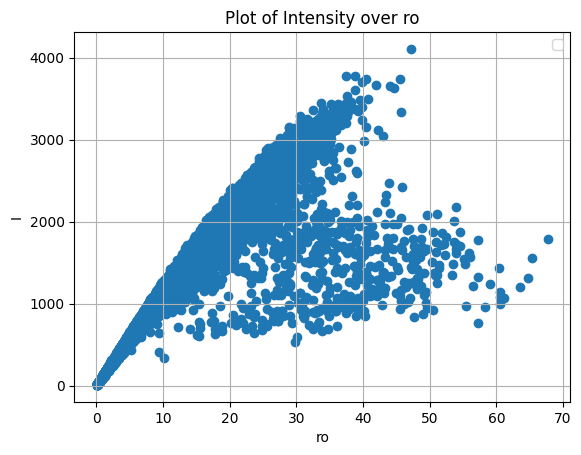

In [ ]:
plt.scatter(diag_a[:,1], diag_a[:,2])
plt.xlabel('ro')
plt.ylabel('I')
plt.title('Plot of Intensity over ro')
plt.legend()
plt.grid(True)
plt.show()

#Víťova inspirace

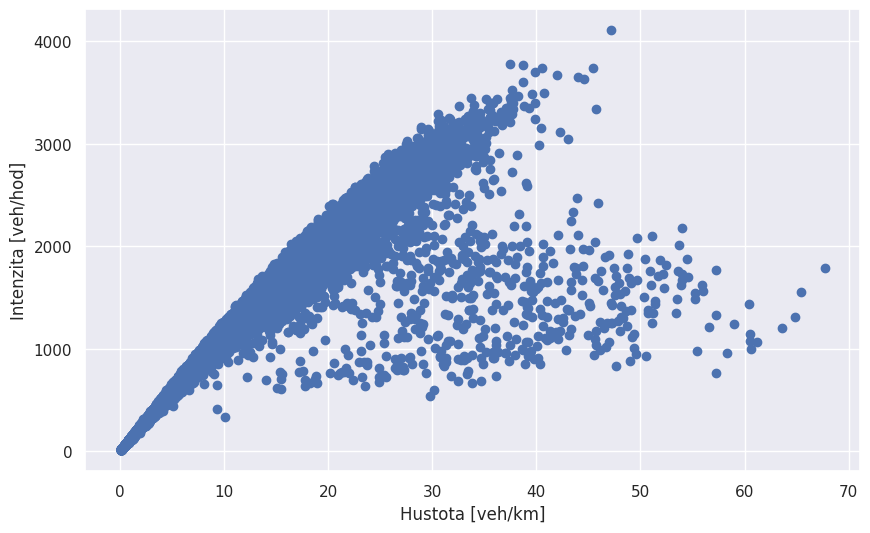

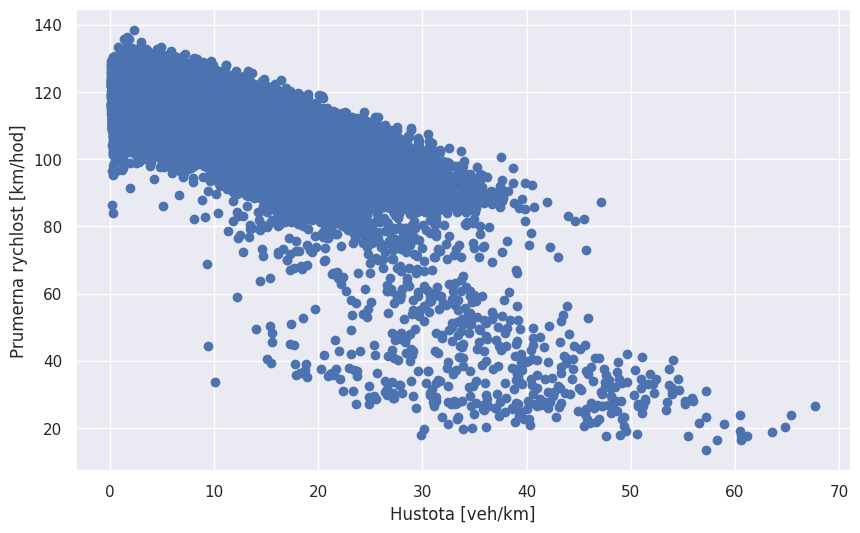

In [ ]:
import scipy.io
data = scipy.io.loadmat('MMDS_data.mat')


rychlost = data['velo']
cas = data['time']
svetlost = data['clearance']


velikost_vzorku = 50
pocet_vzorku = rychlost.shape[0] // velikost_vzorku

intenzita = []
hustota = []
rychlost_prumer = []
for i in range(pocet_vzorku):
  rychlost_prumer.append(rychlost[i * velikost_vzorku:(i + 1) * velikost_vzorku].mean())
  intenzita.append((velikost_vzorku*3600)/(cas[(i + 1) * velikost_vzorku - 1] - cas[i * velikost_vzorku]))
  hustota.append(intenzita[-1] / rychlost_prumer[-1])


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(10, 6))
plt.plot(hustota, intenzita, 'o')
plt.xlabel('Hustota [veh/km]')
plt.ylabel('Intenzita [veh/hod]')
plt.show()

# rychlost v zavislosti na hustote
plt.figure(figsize=(10, 6))
plt.plot(hustota, rychlost_prumer, 'o')
plt.xlabel('Hustota [veh/km]')
plt.ylabel('Prumerna rychlost [km/hod]')
plt.show()

In [ ]:
cas_ex = []
rychlost_ex = []
svetlost_ex = []
for i in range(pocet_vzorku):
    rychlost_prumer = rychlost[i * velikost_vzorku:(i + 1) * velikost_vzorku].mean()
    svetlost_prumer = svetlost[i * velikost_vzorku:(i + 1) * velikost_vzorku].mean()
    intenzita = (velikost_vzorku * 3600) / (cas[(i + 1) * velikost_vzorku - 1] - cas[i * velikost_vzorku])
    hustota = intenzita / rychlost_prumer
    if 40 <= hustota <= 50 and 1000 <= intenzita <= 2000:
        cas_ex.append((cas[i * velikost_vzorku:(i + 1) * velikost_vzorku]))
        rychlost_ex.append((rychlost[i * velikost_vzorku:(i + 1) * velikost_vzorku]))
        svetlost_ex.append((svetlost[i * velikost_vzorku:(i + 1) * velikost_vzorku] / svetlost_prumer))

In [ ]:
print(svetlost_ex)

[array([[0.98139573],
       [0.86500378],
       [0.70137485],
       [1.04271793],
       [2.06193164],
       [1.59937185],
       [0.90165969],
       [1.65241294],
       [0.4673313 ],
       [0.34551316],
       [0.71203412],
       [0.67500032],
       [1.32686819],
       [1.41642266],
       [0.85230648],
       [0.94762962],
       [1.09712636],
       [0.77097641],
       [0.54779794],
       [0.72737817],
       [0.48094727],
       [1.85453881],
       [0.6112612 ],
       [1.25448111],
       [1.05039953],
       [0.48143942],
       [1.14533107],
       [0.68080256],
       [1.38234331],
       [1.44689202],
       [0.75912143],
       [0.88934028],
       [0.85759702],
       [0.82532471],
       [1.16444852],
       [0.71373116],
       [0.9586464 ],
       [1.30508664],
       [0.70315008],
       [1.34485604],
       [0.95160767],
       [1.49025564],
       [0.82532471],
       [0.79411051],
       [0.88644737],
       [1.03625636],
       [0.78961355],
       [0.99

ValueError: x must have 2 or fewer dimensions

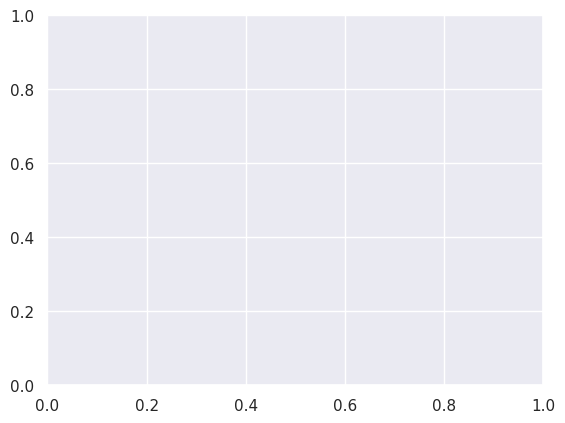

In [ ]:
plt.hist(np.array(svetlost_ex), bins=10)

# Add labels and title
plt.xlabel('Svetlost')
plt.ylabel('Frequency')
plt.title('Histogram of Svetlost from data_ex')

# Show plot
plt.show()